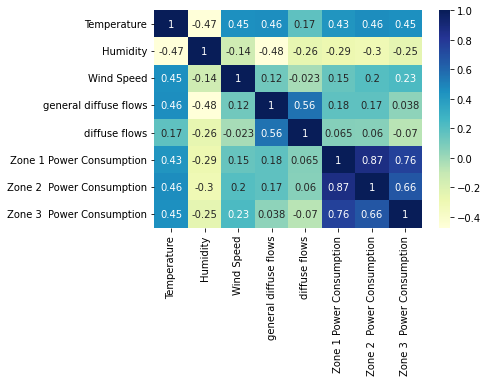

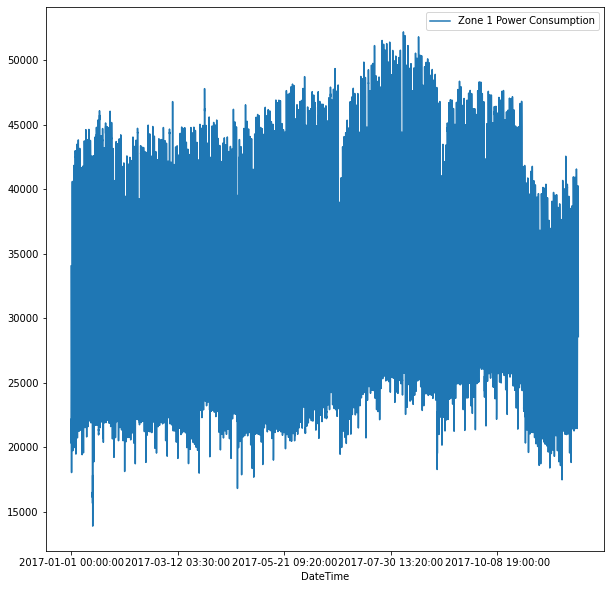

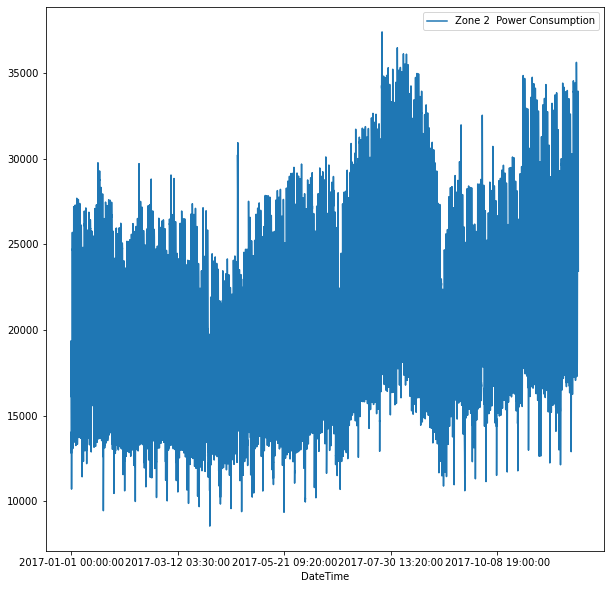

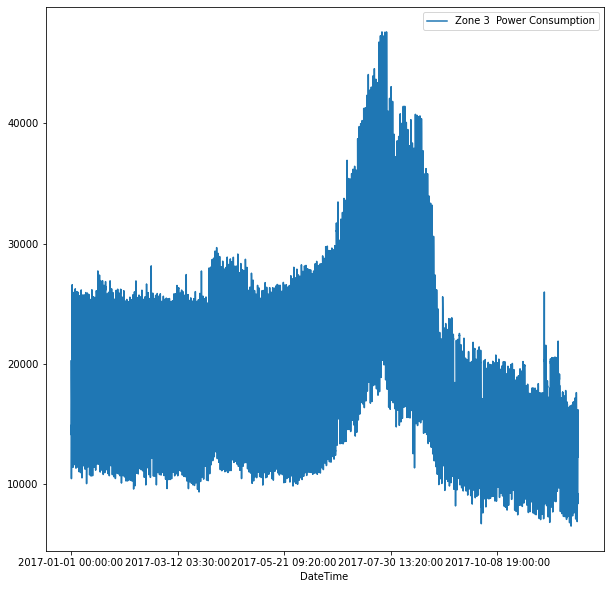

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("Hyderabad_Power_Train.csv")
data_test = pd.read_csv("Hyderabad_Power_Test.csv")
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
data.plot(x="DateTime", y="Zone 1 Power Consumption",
        kind="line", figsize=(10, 10))
#print(data.columns)
plt.show()
data.plot(x="DateTime", y="Zone 2  Power Consumption",
        kind="line", figsize=(10, 10))
data.plot(x="DateTime", y="Zone 3  Power Consumption",
        kind="line", figsize=(10, 10))
plt.show()

In [ ]:
print(data)
print(data.dtypes)

                  DateTime  Temperature  Humidity  Wind Speed  \
0      2017-01-01 00:00:00        6.559      73.8       0.083   
1      2017-01-01 00:10:00        6.414      74.5       0.083   
2      2017-01-01 00:20:00          NaN      74.5       0.080   
3      2017-01-01 00:30:00        6.121      75.0       0.083   
4      2017-01-01 00:40:00        5.921      75.7       0.081   
...                    ...          ...       ...         ...   
47591  2017-11-30 23:10:00       12.650      85.9       0.074   
47592  2017-11-30 23:20:00       12.620      86.1       0.071   
47593  2017-11-30 23:30:00       12.630      86.2       0.071   
47594  2017-11-30 23:40:00          NaN      86.1       0.071   
47595  2017-11-30 23:50:00       12.210      85.9       0.073   

       general diffuse flows  diffuse flows  Zone 1 Power Consumption  \
0                      0.051          0.119               34055.69620   
1                      0.070          0.085               29814.68354   


In [ ]:
data1 = data
data1['DateTime'] = pd.to_datetime(data1['DateTime'])
data_test1 = data_test
data_test1['DateTime'] = pd.to_datetime(data_test1['DateTime'])
print(data1.dtypes)

DateTime                     datetime64[ns]
Temperature                         float64
Humidity                            float64
Wind Speed                          float64
general diffuse flows               float64
diffuse flows                       float64
Zone 1 Power Consumption            float64
Zone 2  Power Consumption           float64
Zone 3  Power Consumption           float64
dtype: object


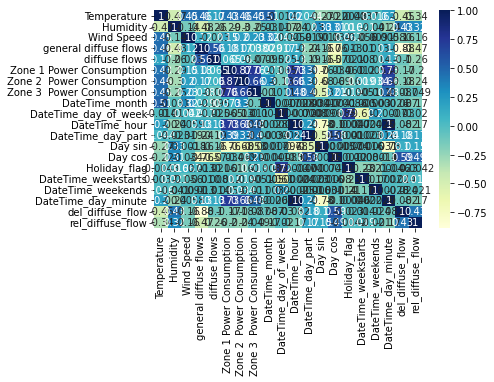

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption',
       'DateTime_month', 'DateTime_day_of_week', 'DateTime_hour',
       'DateTime_day_part', 'DateTime_date', 'Day sin', 'Day cos',
       'Holiday_flag', 'DateTime_weekstarts', 'DateTime_weekends',
       'DateTime_day_minute', 'del_diffuse_flow', 'rel_diffuse_flow'],
      dtype='object')


In [ ]:
dataplot = sns.heatmap(data1.corr(), cmap="YlGnBu", annot=True)
plt.show()
print(data.columns)

In [ ]:
def day_part(hour):
    if hour in [4,5]:
        return 1 #"dawn"
    elif hour in [6,7]:
        return 2 #"early morning"
    elif hour in [8,9,10]:
        return 3 #"late morning"
    elif hour in [11,12,13]:
        return 4 #"noon"
    elif hour in [14,15,16]:
        return 5 #"afternoon"
    elif hour in [17, 18,19]:
        return 6 #"evening"
    elif hour in [20, 21, 22]:
        return 7 #"night"
    elif hour in [23,0,1,2,3]:
        return 8 #"midnight"

data1["DateTime_month"] = data1["DateTime"].dt.month
data1["DateTime_day_of_week"] = data1["DateTime"].dt.day_of_week
#data1["DateTime_week_of_year"] = data1["DateTime"].dt.week_of_year
data1["DateTime_hour"] = data1["DateTime"].dt.hour
data1["DateTime_day_part"] = data1["DateTime_hour"].apply(day_part)
data1["DateTime_date"] = data1["DateTime"].dt.date

data_test1["DateTime_month"] = data_test1["DateTime"].dt.month
data_test1["DateTime_day_of_week"] = data_test1["DateTime"].dt.day_of_week
#data_test1["DateTime_week_of_year"] = data_test1["DateTime"].dt.week_of_year
data_test1["DateTime_hour"] = data_test1["DateTime"].dt.hour
data_test1["DateTime_day_part"] = data_test1["DateTime_hour"].apply(day_part)
data_test1["DateTime_date"] = data_test1["DateTime"].dt.date

timestamp_s = data1['DateTime'].dt.hour
day = 24
data1['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
data1['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
data_test1['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
data_test1['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))

from datetime import date
holiday = []
for row in data1["DateTime_date"]:
  if row in [date.fromisoformat('2017-01-13'), date.fromisoformat('2017-01-26'), date.fromisoformat('2017-02-24'), date.fromisoformat('2017-03-29'), date.fromisoformat('2017-04-01'), date.fromisoformat('2017-04-05'), date.fromisoformat('2017-04-14'), date.fromisoformat('2017-06-26'), date.fromisoformat('2017-06-27'), date.fromisoformat('2017-07-10'), date.fromisoformat('2017-08-15'), date.fromisoformat('2017-08-25'), date.fromisoformat('2017-09-02'), date.fromisoformat('2017-09-20'), date.fromisoformat('2017-09-28'), date.fromisoformat('2017-09-30'), date.fromisoformat('2017-10-02'), date.fromisoformat('2017-10-18'), date.fromisoformat('2017-11-04'), date.fromisoformat('2017-12-02'), date.fromisoformat('2017-12-25'), date.fromisoformat('2017-12-26')]:
    holiday.append(1)
  else:
    holiday.append(0)
data1['Holiday_flag'] = holiday

holiday = []
for row in data_test1["DateTime_date"]:
  if row in [date.fromisoformat('2017-01-13'), date.fromisoformat('2017-01-26'), date.fromisoformat('2017-02-24'), date.fromisoformat('2017-03-29'), date.fromisoformat('2017-04-01'), date.fromisoformat('2017-04-05'), date.fromisoformat('2017-04-14'), date.fromisoformat('2017-06-26'), date.fromisoformat('2017-06-27'), date.fromisoformat('2017-07-10'), date.fromisoformat('2017-08-15'), date.fromisoformat('2017-08-25'), date.fromisoformat('2017-09-02'), date.fromisoformat('2017-09-20'), date.fromisoformat('2017-09-28'), date.fromisoformat('2017-09-30'), date.fromisoformat('2017-10-02'), date.fromisoformat('2017-10-18'), date.fromisoformat('2017-11-04'), date.fromisoformat('2017-12-02'), date.fromisoformat('2017-12-25'), date.fromisoformat('2017-12-26')]:
    holiday.append(1)
  else:
    holiday.append(0)
data_test1['Holiday_flag'] = holiday

weekend = []
for index, row in enumerate(data1["DateTime_day_of_week"]):
  if row in [5, 6]:
    weekend.append(1)
  else:
    weekend.append(0)
data1['Weekend_flag'] = weekend

weekend = []
for index, row in enumerate(data_test1["DateTime_day_of_week"]):
  if row in [5, 6]:
    weekend.append(1)
  else:
    weekend.append(0)
data_test1['Weekend_flag'] = weekend

data1["DateTime_weekstarts"] = data1["DateTime_day_of_week"].apply(lambda x: x==0)
data1["DateTime_weekends"] = data1["DateTime_day_of_week"].apply(lambda x: x==4)
data_test1["DateTime_weekstarts"] = data_test1["DateTime_day_of_week"].apply(lambda x: x==0)
data_test1["DateTime_weekends"] = data_test1["DateTime_day_of_week"].apply(lambda x: x==4)

data1["DateTime_day_minute"] = (data1["DateTime"].dt.hour)*60+data1["DateTime"].dt.minute
data_test1["DateTime_day_minute"] = (data_test1["DateTime"].dt.hour)*60+data_test1["DateTime"].dt.minute

data_test1['del_diffuse_flow'] = data_test1['diffuse flows'] - data_test1['general diffuse flows']
data_test1['rel_diffuse_flow'] = data_test1['del_diffuse_flow']/data_test1['general diffuse flows']
data_test1['rel_diffuse_flow'] = data_test1['rel_diffuse_flow'].fillna(0)
data1['del_diffuse_flow'] = data1['diffuse flows'] - data1['general diffuse flows']
data1['rel_diffuse_flow'] = data1['del_diffuse_flow']/data1['general diffuse flows']
data1['rel_diffuse_flow'] = data1['rel_diffuse_flow'].fillna(0)

In [ ]:
print(data_test1)

                DateTime  Temperature  Humidity  Wind Speed  \
0    2017-12-01 00:00:00       19.070     55.77       0.086   
1    2017-12-01 00:10:00       18.990     56.70       0.080   
2    2017-12-01 00:20:00       18.880     58.11       0.078   
3    2017-12-01 00:30:00       18.780     58.98       0.080   
4    2017-12-01 00:40:00       18.770     59.98       0.078   
...                  ...          ...       ...         ...   
4315 2017-12-30 23:10:00        7.010     72.40       0.080   
4316 2017-12-30 23:20:00        6.947     72.60       0.082   
4317 2017-12-30 23:30:00        6.900     72.80       0.086   
4318 2017-12-30 23:40:00        6.758     73.00       0.080   
4319 2017-12-30 23:50:00        6.580     74.10       0.081   

      general diffuse flows  diffuse flows  DateTime_month  \
0                     0.048          0.100              12   
1                     0.066          0.093              12   
2                     0.070          0.104              1

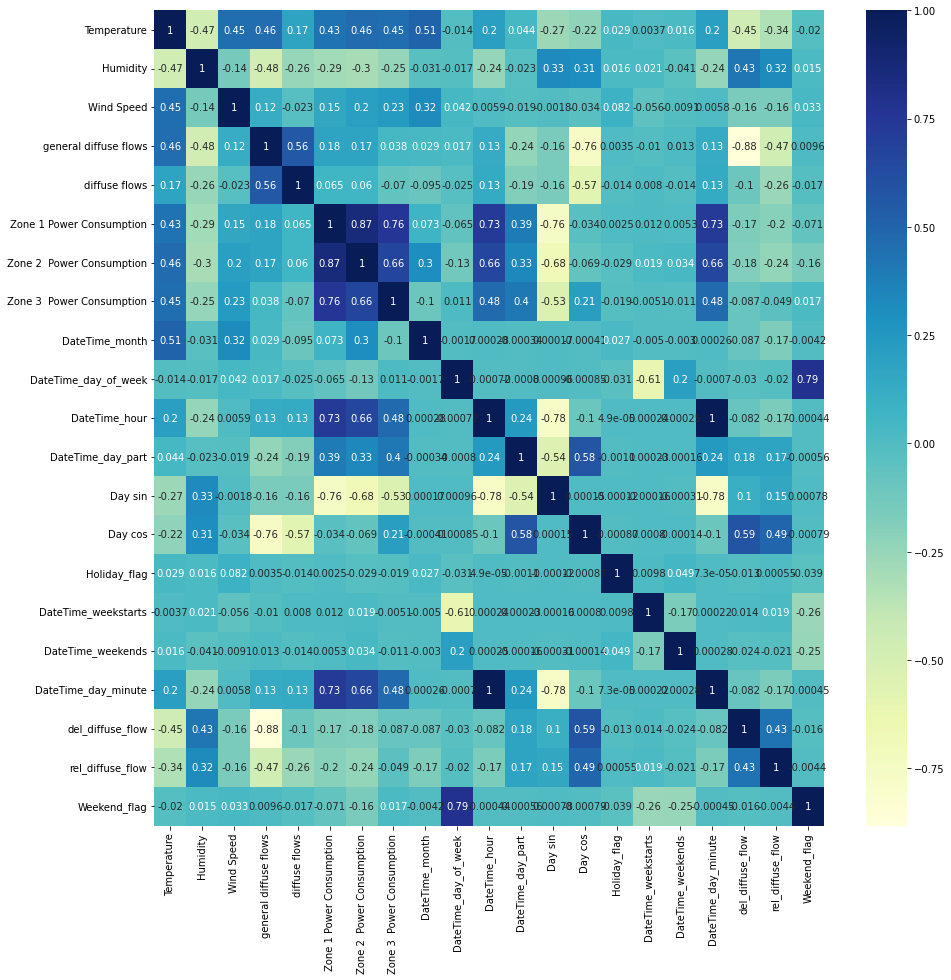

In [ ]:
plt.figure(figsize = (15,15))
dataplot = sns.heatmap(data1.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
print(data1.columns)

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption',
       'DateTime_month', 'DateTime_day_of_week', 'DateTime_hour',
       'DateTime_day_part', 'DateTime_date', 'Day sin', 'Day cos',
       'Holiday_flag', 'DateTime_weekstarts', 'DateTime_weekends',
       'DateTime_day_minute', 'del_diffuse_flow', 'rel_diffuse_flow',
       'Weekend_flag'],
      dtype='object')


In [ ]:
data2 = data1[["Temperature", "Humidity", "Wind Speed", "DateTime_month", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos", "Holiday_flag", "Weekend_flag", 'DateTime_weekstarts', 'DateTime_weekends',
       'DateTime_day_minute', 'rel_diffuse_flow', "Zone 1 Power Consumption", "Zone 2  Power Consumption", "Zone 3  Power Consumption"]]
data_test2 = data_test1[["Temperature", "Humidity", "Wind Speed", "DateTime_month", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos", "Holiday_flag", "Weekend_flag", 'DateTime_weekstarts', 'DateTime_weekends',
       'DateTime_day_minute', 'rel_diffuse_flow']]
for i in ["Temperature", "Humidity", "Wind Speed"]:#, "general diffuse flows", "diffuse flows"]:
  data2[i] = data2[i].bfill()
  data_test2[i] = data_test2[i].bfill()
# for i in ["Temperature", "Wind Speed"]:
#   data2[i] = data2[i].bfill()
#   data_test2[i] = data_test2[i].bfill()
# for i in ["general diffuse flows", "diffuse flows"]:
#   data2[i] = data2[i].fillna(data2[i].mean())
#   data_test2[i] = data_test2[i].fillna(data_test2[i].mean())
#print(data2)

<ipython-input-6-80b28f847f11>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[i] = data2[i].bfill()
<ipython-input-6-80b28f847f11>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test2[i] = data_test2[i].bfill()


In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
X = data2.drop(['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption'], axis=1)
y = data2[['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
y_train_zone1 = y_train['Zone 1 Power Consumption']
y_train_zone2 = y_train['Zone 2  Power Consumption']
y_train_zone3 = y_train['Zone 3  Power Consumption']
y_test_zone1 = y_test['Zone 1 Power Consumption']
y_test_zone2 = y_test['Zone 2  Power Consumption']
y_test_zone3 = y_test['Zone 3  Power Consumption']

## Additional fields

In [ ]:
X_train_zone1 = X_train[["Temperature", "Humidity", "Wind Speed", "DateTime_month", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos", "Holiday_flag", "Weekend_flag", 'DateTime_weekstarts', 'DateTime_weekends',
       'DateTime_day_minute', 'rel_diffuse_flow']]
X_test_zone1 = X_test[["Temperature", "Humidity", "Wind Speed", "DateTime_month", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos", "Holiday_flag", "Weekend_flag", 'DateTime_weekstarts', 'DateTime_weekends',
       'DateTime_day_minute', 'rel_diffuse_flow']]

hyperparameters1 = {
    "n_estimators" : 1000,
    "max_depth" : 12,
    "subsample" : 0.5,
    "min_child_weight" : 10,
    'gamma': 4.325918709955589, 
    'reg_lambda': 7.0 
    }

model1 = xgb.XGBRegressor(
    n_estimators=hyperparameters1["n_estimators"],
    max_depth=hyperparameters1["max_depth"],
    subsample=hyperparameters1["subsample"],
    min_child_weight=hyperparameters1["min_child_weight"],
    gamma=hyperparameters1["gamma"],
    reg_lambda=hyperparameters1["reg_lambda"],
    objective="reg:squarederror",
    tree_method="hist"
    )

model1.fit(X_train_zone1, y_train_zone1)
test_forecasts_zone1 = model1.predict(X_test_zone1)
test_mae_zone1 = mean_absolute_percentage_error(y_test_zone1, test_forecasts_zone1)
print(test_mae_zone1)

0.016600274718504997


In [ ]:
X_train_zone2 = X_train[["Temperature", "Humidity", "Wind Speed", "DateTime_month", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos", "Holiday_flag", "Weekend_flag", 'DateTime_weekstarts', 'DateTime_weekends',
       'DateTime_day_minute', 'rel_diffuse_flow']]
X_test_zone2 = X_test[["Temperature", "Humidity", "Wind Speed", "DateTime_month", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos", "Holiday_flag", "Weekend_flag", 'DateTime_weekstarts', 'DateTime_weekends',
       'DateTime_day_minute', 'rel_diffuse_flow']]

hyperparameters2 = {
    "n_estimators" : 1000,
    "max_depth" : 12,
    "subsample" : 0.5,
    "min_child_weight" : 10,
    'gamma': 4.325918709955589, 
    'reg_lambda': 7.0 
    }

model2 = xgb.XGBRegressor(
    n_estimators=hyperparameters2["n_estimators"],
    max_depth=hyperparameters2["max_depth"],
    subsample=hyperparameters2["subsample"],
    min_child_weight=hyperparameters2["min_child_weight"],
    gamma=hyperparameters1["gamma"],
    reg_lambda=hyperparameters1["reg_lambda"],
    objective="reg:squarederror",
    tree_method="hist"
    )

model2.fit(X_train_zone2, y_train_zone2)
test_forecasts_zone2 = model2.predict(X_test_zone2)
test_mae_zone2 = mean_absolute_percentage_error(y_test_zone2, test_forecasts_zone2)
print(test_mae_zone2)

0.02131506486122016


In [ ]:
X_train_zone3 = X_train[["Temperature", "Humidity", "Wind Speed",  "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos", "Holiday_flag", "Weekend_flag", 'DateTime_weekstarts', 'DateTime_weekends',
       'DateTime_day_minute', 'rel_diffuse_flow']]
X_test_zone3 = X_test[["Temperature", "Humidity", "Wind Speed", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos", "Holiday_flag", "Weekend_flag", 'DateTime_weekstarts', 'DateTime_weekends',
       'DateTime_day_minute', 'rel_diffuse_flow']]

hyperparameters3 = {
    "n_estimators" : 1000,
    "max_depth" : 12,
    "subsample" : 0.5,
    "min_child_weight" : 10,
    'gamma': 4.325918709955589, 
    'reg_lambda': 7.0 
    }

model3 = xgb.XGBRegressor(
    n_estimators=hyperparameters3["n_estimators"],
    max_depth=hyperparameters3["max_depth"],
    subsample=hyperparameters3["subsample"],
    min_child_weight=hyperparameters3["min_child_weight"],
    gamma=hyperparameters1["gamma"],
    reg_lambda=hyperparameters1["reg_lambda"],
    objective="reg:squarederror",
    tree_method="hist"
    )

model3.fit(X_train_zone3, y_train_zone3)
test_forecasts_zone3 = model3.predict(X_test_zone3)
test_mae_zone3 = mean_absolute_percentage_error(y_test_zone3, test_forecasts_zone3)
print(test_mae_zone3)

0.058216677586741795


In [ ]:
hyperparameters = {
    "n_estimators" : 40000,
    "max_depth" : 12,
    "subsample" : 0.5,
    "min_child_weight" : 10,
    'gamma': 4.325918709955589, 
    'reg_lambda': 7.0 
    }

model4 = xgb.XGBRegressor(
    n_estimators=hyperparameters["n_estimators"],
    max_depth=hyperparameters["max_depth"],
    subsample=hyperparameters["subsample"],
    min_child_weight=hyperparameters["min_child_weight"],
    gamma=hyperparameters["gamma"],
    reg_lambda=hyperparameters["reg_lambda"],
    objective="reg:squarederror",
    tree_method="hist"
    )

trained_model = MultiOutputRegressor(model4).fit(X_train, y_train)
test_forecasts = trained_model.predict(X_test)
test_mae = mean_absolute_percentage_error(y_test, test_forecasts)
print(test_mae)
print(trained_model.predict(data_test2))

0.0234504266785112
[[27204.969 22081.508 13364.292]
 [27694.996 21336.82  13299.561]
 [26951.498 21214.041 11862.55 ]
 ...
 [28689.572 21561.654 12291.732]
 [28117.986 22313.352 12382.133]
 [27663.783 21372.8   12586.913]]


In [ ]:
mat = np.matrix(trained_model.predict(data_test2))
data_test_final = pd.concat([data_test1, pd.DataFrame(mat)], axis=1)
data_test_final = data_test_final[['DateTime', 0, 1, 2]]
data_test_final.columns = ['DateTime', 'Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']
print(data_test_final)
data_test_final.to_csv('test_submission_weekendflag.csv', encoding='utf-8', index=False)

                DateTime  Zone 1 Power Consumption  Zone 2  Power Consumption  \
0    2017-12-01 00:00:00              25457.867188               21665.144531   
1    2017-12-01 00:10:00              25986.312500               21312.199219   
2    2017-12-01 00:20:00              24970.218750               21302.980469   
3    2017-12-01 00:30:00              24069.326172               20639.599609   
4    2017-12-01 00:40:00              23665.777344               20619.412109   
...                  ...                       ...                        ...   
4315 2017-12-30 23:10:00              29970.228516               22614.984375   
4316 2017-12-30 23:20:00              28983.921875               22654.974609   
4317 2017-12-30 23:30:00              28727.748047               22037.115234   
4318 2017-12-30 23:40:00              27874.132812               21452.541016   
4319 2017-12-30 23:50:00              27804.462891               21500.566406   

      Zone 3  Power Consump

(51916, 4)


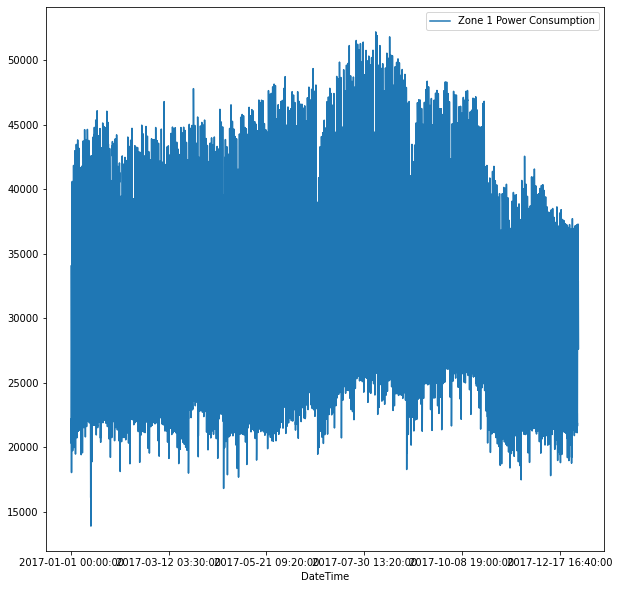

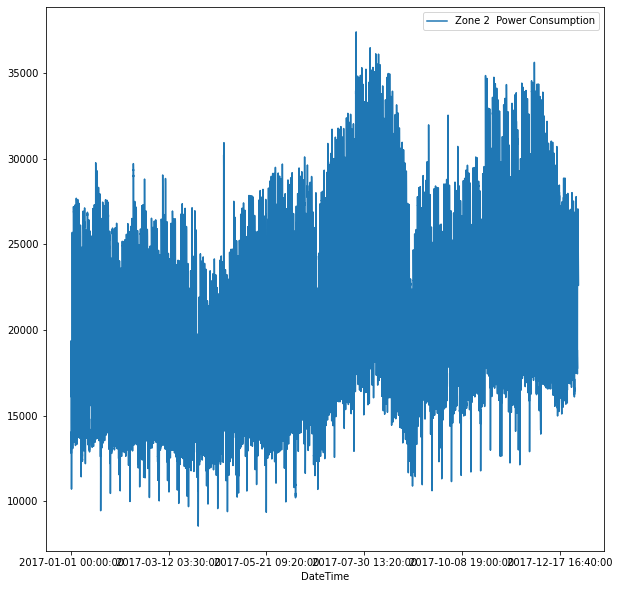

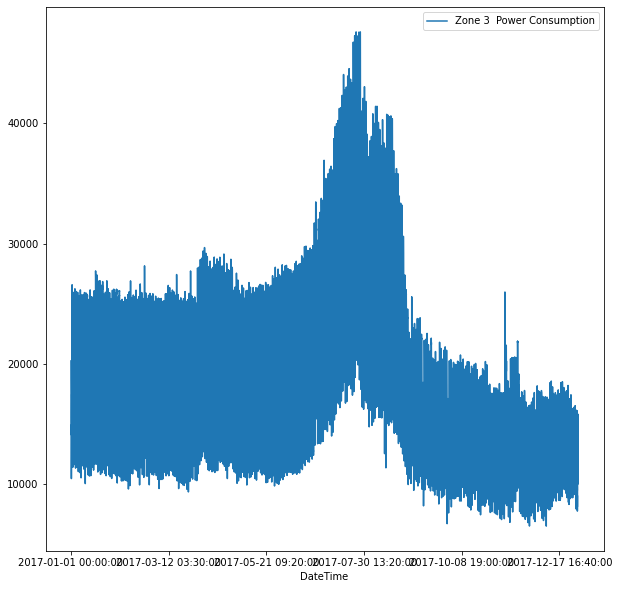

(51916, 4)


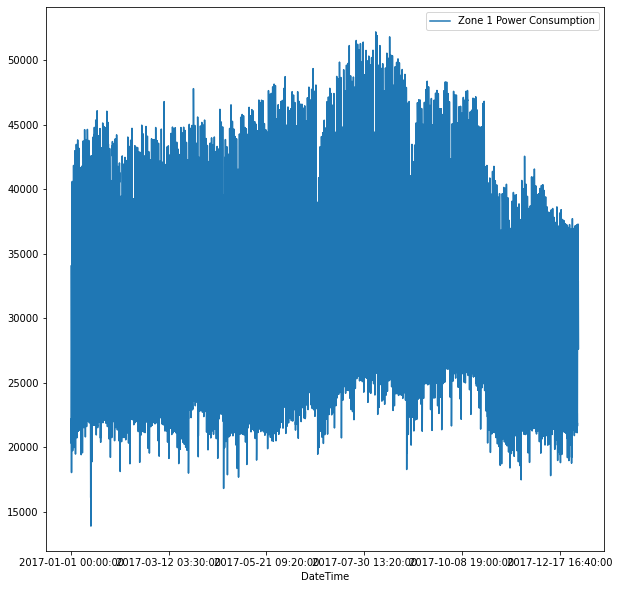

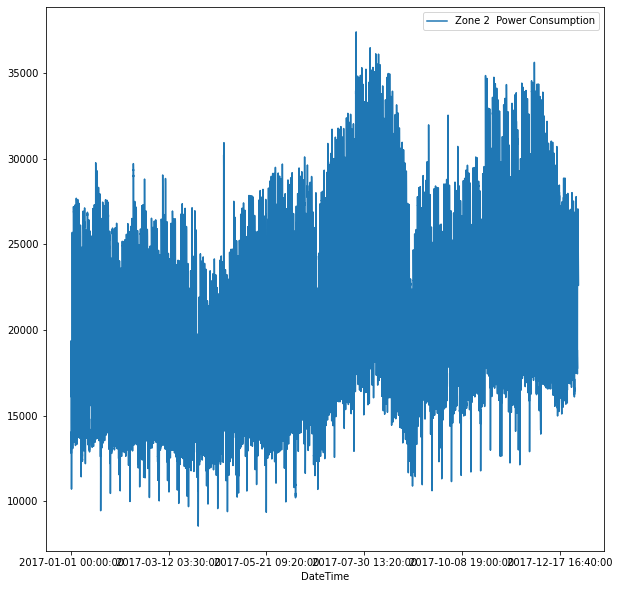

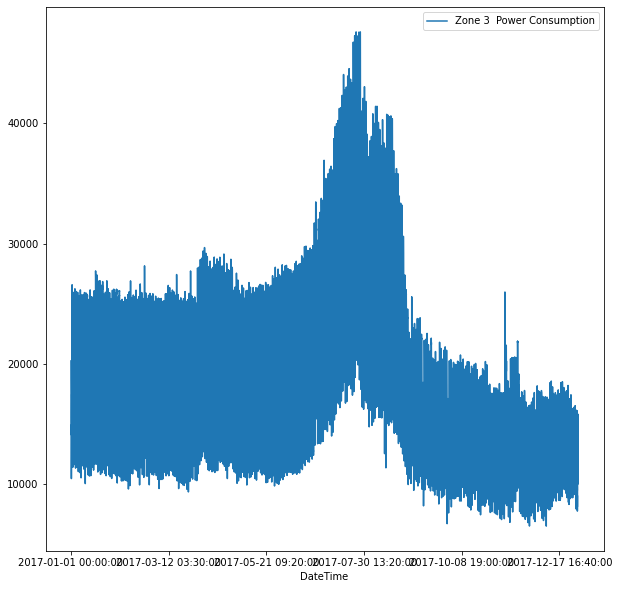

In [ ]:
data_train_final = data1[["DateTime", "Zone 1 Power Consumption", "Zone 2  Power Consumption", "Zone 3  Power Consumption"]]
test_submission = pd.read_csv("test_submission.csv")
data_train_final1 = data_train_final
data_train_final1 = data_train_final1.append(test_submission, ignore_index = True)
print(data_train_final1.shape)
data_train_final1.plot(x="DateTime", y="Zone 1 Power Consumption",
        kind="line", figsize=(10, 10))
data_train_final1.plot(x="DateTime", y="Zone 2  Power Consumption",
        kind="line", figsize=(10, 10))
data_train_final1.plot(x="DateTime", y="Zone 3  Power Consumption",
        kind="line", figsize=(10, 10))
plt.show()

test_submission_holidays = pd.read_csv("test_submission.csv")
data_train_final2 = data_train_final
data_train_final2 = data_train_final2.append(test_submission, ignore_index = True)
print(data_train_final2.shape)
data_train_final2.plot(x="DateTime", y="Zone 1 Power Consumption",
        kind="line", figsize=(10, 10))
data_train_final2.plot(x="DateTime", y="Zone 2  Power Consumption",
        kind="line", figsize=(10, 10))
data_train_final2.plot(x="DateTime", y="Zone 3  Power Consumption",
        kind="line", figsize=(10, 10))
plt.show()

## Normalization (normal wala)

In [ ]:
# Normalize 
X_train_mean = X_train.mean()
X_train_std = X_train.std()

X_train_norm = (X_train - X_train_mean) / X_train_std
X_test_norm = (X_test - X_train_mean) / X_train_std

In [ ]:
X_train_zone1 = X_train_norm[["Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows", "DateTime_month", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos"]]
X_test_zone1 = X_test_norm[["Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows", "DateTime_month", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos"]]

hyperparameters1 = {
    "step_size" : 12,
    "n_estimators" : 500,
    "max_depth" : 6,
    "subsample" : 0.5,
    "min_child_weight" : 1
    }

model1 = xgb.XGBRegressor(
    n_estimators=hyperparameters1["n_estimators"],
    max_depth=hyperparameters1["max_depth"],
    subsample=hyperparameters1["subsample"],
    min_child_weight=hyperparameters1["min_child_weight"],
    objective="reg:squarederror",
    tree_method="hist"
    )

model1.fit(X_train_zone1, y_train_zone1)
test_forecasts_zone1 = model1.predict(X_test_zone1)
test_mae_zone1 = mean_absolute_percentage_error(y_test_zone1, test_forecasts_zone1)
print(test_mae_zone1)

0.03448872544292844


In [ ]:
X_train_zone2 = X_train_norm[["Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows", "DateTime_month", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos"]]
X_test_zone2 = X_test_norm[["Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows", "DateTime_month", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos"]]

hyperparameters2 = {
    "step_size" : 12,
    "n_estimators" : 500,
    "max_depth" : 6,
    "subsample" : 0.5,
    "min_child_weight" : 1
    }

model2 = xgb.XGBRegressor(
    n_estimators=hyperparameters2["n_estimators"],
    max_depth=hyperparameters2["max_depth"],
    subsample=hyperparameters2["subsample"],
    min_child_weight=hyperparameters2["min_child_weight"],
    objective="reg:squarederror",
    tree_method="hist"
    )

model2.fit(X_train_zone2, y_train_zone2)
test_forecasts_zone2 = model2.predict(X_test_zone2)
test_mae_zone2 = mean_absolute_percentage_error(y_test_zone2, test_forecasts_zone2)
print(test_mae_zone2)

0.047930947328611154


In [ ]:
X_train_zone3 = X_train_norm[["Temperature", "Humidity", "Wind Speed", "general diffuse flows", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos"]]
X_test_zone3 = X_test_norm[["Temperature", "Humidity", "Wind Speed", "general diffuse flows", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos"]]

hyperparameters3 = {
    "step_size" : 12,
    "n_estimators" : 500,
    "max_depth" : 6,
    "subsample" : 0.5,
    "min_child_weight" : 1
    }

model3 = xgb.XGBRegressor(
    n_estimators=hyperparameters3["n_estimators"],
    max_depth=hyperparameters3["max_depth"],
    subsample=hyperparameters3["subsample"],
    min_child_weight=hyperparameters3["min_child_weight"],
    objective="reg:squarederror",
    tree_method="hist"
    )

model3.fit(X_train_zone3, y_train_zone3)
test_forecasts_zone3 = model3.predict(X_test_zone3)
test_mae_zone3 = mean_absolute_percentage_error(y_test_zone3, test_forecasts_zone3)
print(test_mae_zone3)

0.08612301373809263


In [ ]:
hyperparameters = {
    "step_size" : 12,
    "n_estimators" : 500,
    "max_depth" : 6,
    "subsample" : 0.5,
    "min_child_weight" : 1
    }

model = xgb.XGBRegressor(
    n_estimators=hyperparameters["n_estimators"],
    max_depth=hyperparameters["max_depth"],
    subsample=hyperparameters["subsample"],
    min_child_weight=hyperparameters["min_child_weight"],
    objective="reg:squarederror",
    tree_method="hist"
    )

trained_model = MultiOutputRegressor(model).fit(X_train_norm, y_train)
test_forecasts = trained_model.predict(X_test_norm)
test_mae = mean_absolute_percentage_error(y_test, test_forecasts)
print(test_mae)

0.041456550881444953


## other scaler normalization methods

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

In [ ]:
def data_scaling( scaling_strategy , scaling_data , scaling_columns ):
    if    scaling_strategy =="RobustScaler" :
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
    elif  scaling_strategy =="StandardScaler" :
        scaling_data[scaling_columns] = StandardScaler().fit_transform(scaling_data[scaling_columns])
    elif  scaling_strategy =="MinMaxScaler" :
        scaling_data[scaling_columns] = MinMaxScaler().fit_transform(scaling_data[scaling_columns])
    elif  scaling_strategy =="MaxAbsScaler" :
        scaling_data[scaling_columns] = MaxAbsScaler().fit_transform(scaling_data[scaling_columns])
    else :  # If any other scaling send by mistake still perform Robust Scalar
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
    return scaling_data

###RobustScaler

In [ ]:
# RobustScaler is better in handling Outliers :
scaling_strategy = ["RobustScaler", "StandardScaler","MinMaxScaler","MaxAbsScaler"]

In [ ]:
X_train_scale = data_scaling(scaling_strategy[0] , X_train , X_train.columns )
X_test_scale  = data_scaling(scaling_strategy[0] , X_test  , X_test.columns )

hyperparameters = {
    "step_size" : 12,
    "n_estimators" : 500,
    "max_depth" : 6,
    "subsample" : 0.5,
    "min_child_weight" : 1
    }

model = xgb.XGBRegressor(
    n_estimators=hyperparameters["n_estimators"],
    max_depth=hyperparameters["max_depth"],
    subsample=hyperparameters["subsample"],
    min_child_weight=hyperparameters["min_child_weight"],
    objective="reg:squarederror",
    tree_method="hist"
    )

trained_model = MultiOutputRegressor(model).fit(X_train_scale, y_train)
test_forecasts = trained_model.predict(X_test_scale)
test_mae = mean_absolute_percentage_error(y_test, test_forecasts)
print(test_mae)

0.059236605528142826


### StandardScaler

In [ ]:
X_train_scale = data_scaling(scaling_strategy[1] , X_train , X_train.columns )
X_test_scale  = data_scaling(scaling_strategy[1] , X_test  , X_test.columns )

hyperparameters = {
    "step_size" : 12,
    "n_estimators" : 500,
    "max_depth" : 6,
    "subsample" : 0.5,
    "min_child_weight" : 1
    }

model = xgb.XGBRegressor(
    n_estimators=hyperparameters["n_estimators"],
    max_depth=hyperparameters["max_depth"],
    subsample=hyperparameters["subsample"],
    min_child_weight=hyperparameters["min_child_weight"],
    objective="reg:squarederror",
    tree_method="hist"
    )

trained_model = MultiOutputRegressor(model).fit(X_train_scale, y_train)
test_forecasts = trained_model.predict(X_test_scale)
test_mae = mean_absolute_percentage_error(y_test, test_forecasts)
print(test_mae)

0.060568123679786194


### MinMaxScaler

In [ ]:
X_train_scale = data_scaling(scaling_strategy[2] , X_train , X_train.columns )
X_test_scale  = data_scaling(scaling_strategy[2] , X_test  , X_test.columns )

hyperparameters = {
    "step_size" : 12,
    "n_estimators" : 500,
    "max_depth" : 6,
    "subsample" : 0.5,
    "min_child_weight" : 1
    }

model = xgb.XGBRegressor(
    n_estimators=hyperparameters["n_estimators"],
    max_depth=hyperparameters["max_depth"],
    subsample=hyperparameters["subsample"],
    min_child_weight=hyperparameters["min_child_weight"],
    objective="reg:squarederror",
    tree_method="hist"
    )

trained_model = MultiOutputRegressor(model).fit(X_train_scale, y_train)
test_forecasts = trained_model.predict(X_test_scale)
test_mae = mean_absolute_percentage_error(y_test, test_forecasts)
print(test_mae)

0.053217767491304045


### MaxAbsScaler

In [ ]:
X_train_scale = data_scaling(scaling_strategy[3] , X_train , X_train.columns )
X_test_scale  = data_scaling(scaling_strategy[3] , X_test  , X_test.columns )

hyperparameters = {
    "step_size" : 12,
    "n_estimators" : 500,
    "max_depth" : 6,
    "subsample" : 0.5,
    "min_child_weight" : 1
    }

model = xgb.XGBRegressor(
    n_estimators=hyperparameters["n_estimators"],
    max_depth=hyperparameters["max_depth"],
    subsample=hyperparameters["subsample"],
    min_child_weight=hyperparameters["min_child_weight"],
    objective="reg:squarederror",
    tree_method="hist"
    )

trained_model = MultiOutputRegressor(model).fit(X_train_scale, y_train)
test_forecasts = trained_model.predict(X_test_scale)
test_mae = mean_absolute_percentage_error(y_test, test_forecasts)
print(test_mae)

0.053217767491304045


## Catboost

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X_train_zone1 = X_train[["Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows", "DateTime_month", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos"]]
X_test_zone1 = X_test[["Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows", "DateTime_month", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos"]]

hyperparameters1 = {
    "n_estimators" : 500,
    "max_depth" : 6,
    "subsample" : 0.5,
    }

model1 = CatBoostRegressor(
    n_estimators=hyperparameters1["n_estimators"],
    max_depth=hyperparameters1["max_depth"],
    subsample=hyperparameters1["subsample"]
    #objective="reg:squarederror",
    )

model1.fit(X_train_zone1, y_train_zone1)
test_forecasts_zone1 = model1.predict(X_test_zone1)
test_mae_zone1 = mean_absolute_percentage_error(y_test_zone1, test_forecasts_zone1)
print(test_mae_zone1)

Learning rate set to 0.127838
0:	learn: 6422.6412428	total: 20.7ms	remaining: 10.3s
1:	learn: 5798.3963202	total: 42.7ms	remaining: 10.6s
2:	learn: 5279.8766381	total: 59.6ms	remaining: 9.87s
3:	learn: 4843.2115383	total: 77.4ms	remaining: 9.6s
4:	learn: 4462.7340998	total: 101ms	remaining: 9.97s
5:	learn: 4116.9728440	total: 120ms	remaining: 9.9s
6:	learn: 3822.4522741	total: 142ms	remaining: 9.97s
7:	learn: 3584.0038548	total: 160ms	remaining: 9.86s
8:	learn: 3380.9408999	total: 184ms	remaining: 10.1s
9:	learn: 3204.4154226	total: 205ms	remaining: 10s
10:	learn: 3065.1395208	total: 224ms	remaining: 9.96s
11:	learn: 2938.8996475	total: 242ms	remaining: 9.84s
12:	learn: 2834.0364152	total: 261ms	remaining: 9.78s
13:	learn: 2746.4213081	total: 277ms	remaining: 9.63s
14:	learn: 2674.1040700	total: 296ms	remaining: 9.58s
15:	learn: 2603.5390371	total: 307ms	remaining: 9.3s
16:	learn: 2553.8083719	total: 313ms	remaining: 8.9s
17:	learn: 2506.3002241	total: 319ms	remaining: 8.54s
18:	learn:

In [ ]:
X_train_zone2 = X_train[["Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows", "DateTime_month", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos"]]
X_test_zone2 = X_test[["Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows", "DateTime_month", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos"]]

hyperparameters2 = {
    "n_estimators" : 500,
    "max_depth" : 6,
    "subsample" : 0.5,
    }

model2 = CatBoostRegressor(
    n_estimators=hyperparameters2["n_estimators"],
    max_depth=hyperparameters2["max_depth"],
    subsample=hyperparameters2["subsample"]
    #objective="reg:squarederror",
    )

model2.fit(X_train_zone2, y_train_zone2)
test_forecasts_zone2 = model2.predict(X_test_zone2)
test_mae_zone2 = mean_absolute_percentage_error(y_test_zone2, test_forecasts_zone2)
print(test_mae_zone2)

Learning rate set to 0.127838
0:	learn: 4593.6269132	total: 6.69ms	remaining: 3.34s
1:	learn: 4202.0003873	total: 12.8ms	remaining: 3.19s
2:	learn: 3840.5299214	total: 18.8ms	remaining: 3.11s
3:	learn: 3540.5532250	total: 27.4ms	remaining: 3.39s
4:	learn: 3286.1922759	total: 33.1ms	remaining: 3.27s
5:	learn: 3071.5460967	total: 39.2ms	remaining: 3.23s
6:	learn: 2895.1718423	total: 49.7ms	remaining: 3.5s
7:	learn: 2745.2765352	total: 58ms	remaining: 3.56s
8:	learn: 2624.6055524	total: 64ms	remaining: 3.49s
9:	learn: 2514.8163380	total: 69.8ms	remaining: 3.42s
10:	learn: 2431.8171752	total: 75.8ms	remaining: 3.37s
11:	learn: 2363.3803373	total: 81.9ms	remaining: 3.33s
12:	learn: 2301.0090433	total: 95.4ms	remaining: 3.57s
13:	learn: 2248.3495123	total: 103ms	remaining: 3.56s
14:	learn: 2198.0240333	total: 109ms	remaining: 3.53s
15:	learn: 2153.5984178	total: 115ms	remaining: 3.49s
16:	learn: 2119.9033410	total: 122ms	remaining: 3.46s
17:	learn: 2086.9116217	total: 128ms	remaining: 3.42s


In [ ]:
X_train_zone3 = X_train[["Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows", "DateTime_month", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos"]]
X_test_zone3 = X_test[["Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows", "DateTime_month", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos"]]

hyperparameters3 = {
    "n_estimators" : 500,
    "max_depth" : 6,
    "subsample" : 0.5,
    }

model3 = CatBoostRegressor(
    n_estimators=hyperparameters3["n_estimators"],
    max_depth=hyperparameters3["max_depth"],
    subsample=hyperparameters3["subsample"]
    #objective="reg:squarederror",
    )

model3.fit(X_train_zone3, y_train_zone3)
test_forecasts_zone3 = model3.predict(X_test_zone3)
test_mae_zone3 = mean_absolute_percentage_error(y_test_zone3, test_forecasts_zone3)
print(test_mae_zone3)

Learning rate set to 0.127838
0:	learn: 5838.8833335	total: 6.54ms	remaining: 3.27s
1:	learn: 5255.4473585	total: 12.8ms	remaining: 3.18s
2:	learn: 4743.1177332	total: 18.8ms	remaining: 3.12s
3:	learn: 4306.3695962	total: 25.3ms	remaining: 3.14s
4:	learn: 3928.9162015	total: 31ms	remaining: 3.07s
5:	learn: 3617.3788345	total: 36.8ms	remaining: 3.03s
6:	learn: 3343.2777796	total: 42.5ms	remaining: 2.99s
7:	learn: 3114.7462855	total: 48.3ms	remaining: 2.97s
8:	learn: 2924.2933567	total: 64ms	remaining: 3.49s
9:	learn: 2740.8051375	total: 74.9ms	remaining: 3.67s
10:	learn: 2593.5555725	total: 80.8ms	remaining: 3.59s
11:	learn: 2471.9450927	total: 86.5ms	remaining: 3.52s
12:	learn: 2356.1857119	total: 92.2ms	remaining: 3.46s
13:	learn: 2259.4881869	total: 97.9ms	remaining: 3.4s
14:	learn: 2179.8859410	total: 103ms	remaining: 3.34s
15:	learn: 2113.8467682	total: 109ms	remaining: 3.3s
16:	learn: 2055.9469280	total: 116ms	remaining: 3.28s
17:	learn: 2004.2976239	total: 124ms	remaining: 3.31s


In [ ]:
hyperparameters = {
    "n_estimators" : 30000,
    "max_depth" : 6,
    "subsample" : 0.5,
    "min_child_weight" : 10,
    #'gamma': 4.325918709955589, 
    'reg_lambda': 7.0 
    }

model5 = CatBoostRegressor(
    n_estimators=hyperparameters["n_estimators"],
    max_depth=hyperparameters["max_depth"],
    subsample=hyperparameters["subsample"],
    #min_child_weight=hyperparameters["min_child_weight"],
    reg_lambda=hyperparameters["reg_lambda"]
    #objective="reg:squarederror",
    )

trained_model = MultiOutputRegressor(model5).fit(X_train, y_train)
test_forecasts = trained_model.predict(X_test)
test_mae = mean_absolute_percentage_error(y_test, test_forecasts)
print(test_mae)

Streaming output truncated to the last 5000 lines.
25001:	learn: 397.8903314	total: 2m 52s	remaining: 34.4s
25002:	learn: 397.8700763	total: 2m 52s	remaining: 34.4s
25003:	learn: 397.8698033	total: 2m 52s	remaining: 34.4s
25004:	learn: 397.8678883	total: 2m 52s	remaining: 34.4s
25005:	learn: 397.8579056	total: 2m 52s	remaining: 34.4s
25006:	learn: 397.8476113	total: 2m 52s	remaining: 34.4s
25007:	learn: 397.8442790	total: 2m 52s	remaining: 34.4s
25008:	learn: 397.8385075	total: 2m 52s	remaining: 34.4s
25009:	learn: 397.8257789	total: 2m 52s	remaining: 34.3s
25010:	learn: 397.8219253	total: 2m 52s	remaining: 34.3s
25011:	learn: 397.8119563	total: 2m 52s	remaining: 34.3s
25012:	learn: 397.8007985	total: 2m 52s	remaining: 34.3s
25013:	learn: 397.7900620	total: 2m 52s	remaining: 34.3s
25014:	learn: 397.7809731	total: 2m 52s	remaining: 34.3s
25015:	learn: 397.7773331	total: 2m 52s	remaining: 34.3s
25016:	learn: 397.7743272	total: 2m 52s	remaining: 34.3s
25017:	learn: 397.7722467	total: 2m 5

In [ ]:
mat = np.matrix(trained_model.predict(data_test2))
data_test_final = pd.concat([data_test1, pd.DataFrame(mat)], axis=1)
data_test_final = data_test_final[['DateTime', 0, 1, 2]]
data_test_final.columns = ['DateTime', 'Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']
print(data_test_final)
data_test_final.to_csv('test_submission_cat.csv', encoding='utf-8', index=False)

                DateTime  Zone 1 Power Consumption  Zone 2  Power Consumption  \
0    2017-12-01 00:00:00              26622.274007               21501.714519   
1    2017-12-01 00:10:00              26361.043130               21268.627307   
2    2017-12-01 00:20:00              25818.378344               20973.767551   
3    2017-12-01 00:30:00              25377.037556               20477.308905   
4    2017-12-01 00:40:00              24894.374156               20003.282680   
...                  ...                       ...                        ...   
4315 2017-12-30 23:10:00              34869.201573               24437.878166   
4316 2017-12-30 23:20:00              33922.562228               24019.536118   
4317 2017-12-30 23:30:00              33281.621579               23646.617943   
4318 2017-12-30 23:40:00              33037.481606               23144.026207   
4319 2017-12-30 23:50:00              32325.643286               22025.389659   

      Zone 3  Power Consump

## LightGBM

In [ ]:
!pip install lightgbm
from lightgbm import LGBMRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X_train_zone1 = X_train[["Temperature", "Humidity", "Wind Speed", "DateTime_month", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos", "Holiday_flag", 'DateTime_weekstarts', 'DateTime_weekends',
       'DateTime_day_minute', 'rel_diffuse_flow']]
X_test_zone1 = X_test[["Temperature", "Humidity", "Wind Speed", "DateTime_month", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos", "Holiday_flag", 'DateTime_weekstarts', 'DateTime_weekends',
       'DateTime_day_minute', 'rel_diffuse_flow']]

hyperparameters1 = {
    "n_estimators" : 1000,
    "max_depth" : 6,
    "subsample" : 0.5,
    }

model1 = LGBMRegressor(
    n_estimators=hyperparameters1["n_estimators"],
    max_depth=hyperparameters1["max_depth"],
    subsample=hyperparameters1["subsample"]
    #objective="reg:squarederror",
    )

model1.fit(X_train_zone1, y_train_zone1)
test_forecasts_zone1 = model1.predict(X_test_zone1)
test_mae_zone1 = mean_absolute_percentage_error(y_test_zone1, test_forecasts_zone1)
print(test_mae_zone1)

0.02487551827733514


In [ ]:
X_train_zone2 = X_train[["Temperature", "Humidity", "Wind Speed", "DateTime_month", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos", "Holiday_flag", 'DateTime_weekstarts', 'DateTime_weekends',
       'DateTime_day_minute', 'rel_diffuse_flow']]
X_test_zone2 = X_test[["Temperature", "Humidity", "Wind Speed", "DateTime_month", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos", "Holiday_flag", 'DateTime_weekstarts', 'DateTime_weekends',
       'DateTime_day_minute', 'rel_diffuse_flow']]

hyperparameters2 = {
    "n_estimators" : 1000,
    "max_depth" : 6,
    "subsample" : 0.5,
    }

model2 = LGBMRegressor(
    n_estimators=hyperparameters2["n_estimators"],
    max_depth=hyperparameters2["max_depth"],
    subsample=hyperparameters2["subsample"]
    #objective="reg:squarederror",
    )

model2.fit(X_train_zone2, y_train_zone2)
test_forecasts_zone2 = model2.predict(X_test_zone2)
test_mae_zone2 = mean_absolute_percentage_error(y_test_zone2, test_forecasts_zone2)
print(test_mae_zone2)

0.03223908698374374


In [ ]:
X_train_zone3 = X_train[["Temperature", "Humidity", "Wind Speed", "DateTime_month", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos", "Holiday_flag", 'DateTime_weekstarts', 'DateTime_weekends',
       'DateTime_day_minute', 'rel_diffuse_flow']]
X_test_zone3 = X_test[["Temperature", "Humidity", "Wind Speed", "DateTime_month", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos", "Holiday_flag", 'DateTime_weekstarts', 'DateTime_weekends',
       'DateTime_day_minute', 'rel_diffuse_flow']]

hyperparameters3 = {
    "n_estimators" : 1000,
    "max_depth" : 6,
    "subsample" : 0.5,
    }

model3 = LGBMRegressor(
    n_estimators=hyperparameters3["n_estimators"],
    max_depth=hyperparameters3["max_depth"],
    subsample=hyperparameters3["subsample"]
    #objective="reg:squarederror",
    )

model3.fit(X_train_zone3, y_train_zone3)
test_forecasts_zone3 = model3.predict(X_test_zone3)
test_mae_zone3 = mean_absolute_percentage_error(y_test_zone3, test_forecasts_zone3)
print(test_mae_zone3)

0.03211688453080631


In [ ]:
hyperparameters = {
    "n_estimators" : 1000,
    "max_depth" : 6,
    "subsample" : 0.5,
    ''
    'reg_lambda': 7.0 
    }

model6 = LGBMRegressor(
    n_estimators=hyperparameters["n_estimators"],
    max_depth=hyperparameters["max_depth"],
    subsample=hyperparameters["subsample"]
    #objective="reg:squarederror",
    )

trained_model = MultiOutputRegressor(model).fit(X_train, y_train)
test_forecasts = trained_model.predict(X_test)
test_mae = mean_absolute_percentage_error(y_test, test_forecasts)
print(test_mae)

0.01988201310605862


In [ ]:
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [ ]:
lr = LinearRegression()
stregr = StackingRegressor(regressors=[model4, model5, model6], 
                           meta_regressor=lr)
trained_model = MultiOutputRegressor(stregr).fit(X_train, y_train)
pred = trained_model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, pred)
print(mape)

Learning rate set to 0.127838
0:	learn: 6418.2443521	total: 6.36ms	remaining: 3.17s
1:	learn: 5811.8932927	total: 12.9ms	remaining: 3.21s
2:	learn: 5311.1217523	total: 19.1ms	remaining: 3.17s
3:	learn: 4860.6854500	total: 25.4ms	remaining: 3.15s
4:	learn: 4496.8533899	total: 31.7ms	remaining: 3.14s
5:	learn: 4170.3149334	total: 38.3ms	remaining: 3.15s
6:	learn: 3894.6093190	total: 44.5ms	remaining: 3.13s
7:	learn: 3635.8128364	total: 50.6ms	remaining: 3.11s
8:	learn: 3434.8955437	total: 57ms	remaining: 3.11s
9:	learn: 3254.1122164	total: 65.5ms	remaining: 3.21s
10:	learn: 3121.7953806	total: 71.5ms	remaining: 3.18s
11:	learn: 2991.0757829	total: 77.5ms	remaining: 3.15s
12:	learn: 2888.0938806	total: 84ms	remaining: 3.15s
13:	learn: 2806.0208237	total: 90.4ms	remaining: 3.14s
14:	learn: 2722.8959634	total: 97.1ms	remaining: 3.14s
15:	learn: 2653.5136658	total: 107ms	remaining: 3.23s
16:	learn: 2590.6507001	total: 113ms	remaining: 3.21s
17:	learn: 2530.6676576	total: 119ms	remaining: 3.2

In [ ]:
svr_rbf = SVR(kernel='rbf')
stregr1 = StackingRegressor(regressors=[model4, model5, model6], 
                           meta_regressor=svr_rbf)
trained_model1 = MultiOutputRegressor(stregr1).fit(X_train, y_train)
pred1 = trained_model1.predict(X_test)
mape1 = mean_absolute_percentage_error(y_test, pred1)
print(mape1)

NameError: ignored

In [ ]:
mat = np.matrix(trained_model1.predict(data_test2))
data_test_final = pd.concat([data_test1, pd.DataFrame(mat)], axis=1)
data_test_final = data_test_final[['DateTime', 0, 1, 2]]
data_test_final.columns = ['DateTime', 'Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']
print(data_test_final)
data_test_final.to_csv('test_submission_lr.csv', encoding='utf-8', index=False)

                DateTime  Zone 1 Power Consumption  Zone 2  Power Consumption  \
0    2017-12-01 00:00:00              25384.443036               21668.823897   
1    2017-12-01 00:10:00              25984.264149               21318.119789   
2    2017-12-01 00:20:00              24896.860649               21324.828477   
3    2017-12-01 00:30:00              23987.634133               20638.225158   
4    2017-12-01 00:40:00              23581.615017               20633.047481   
...                  ...                       ...                        ...   
4315 2017-12-30 23:10:00              30104.317698               22620.801177   
4316 2017-12-30 23:20:00              29121.847550               22698.842094   
4317 2017-12-30 23:30:00              28882.810797               22082.393716   
4318 2017-12-30 23:40:00              28054.497394               21463.922990   
4319 2017-12-30 23:50:00              27962.435302               21539.814501   

      Zone 3  Power Consump

## GridSearchCV

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV

In [ ]:
X_train_zone1 = X_train[["Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows", "DateTime_month", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos"]]
X_test_zone1 = X_test[["Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows", "DateTime_month", "DateTime_hour", "DateTime_day_part", "Day sin", "Day cos"]]

param_grid = { 
    "colsample_bytree": [ 0.3, 0.5 , 0.8 ],
    "reg_alpha": [0, 0.5, 1, 5],
    "reg_lambda": [0, 0.5, 1, 5],
    'objective':['reg:squarederror'],
    'tree_method' : ['hist'],
    'n_estimators': [500]
    }
scoring = ['recall']
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
xgb1 = xgb.XGBRegressor()
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:linear', 'reg:squarederror'],
#               'learning_rate': [.0001, 0.001, .01, 0.03, 0.05, 0.07, 0.1, 1], #so called `eta` value
#               'max_depth': [5, 6, 7],
#               "subsample": [ 0.3, 0.5 , 0.8 ],
#               'min_child_weight': [1, 4],
#               'silent': [1],
#               'subsample': [ 0.3, 0.5 , 0.8 ],
#               'colsample_bytree': [0.7],
#               'n_estimators': [500, 1000],
#               'tree_method' : ['hist']}

xgb_grid = GridSearchCV(xgb1,
                        param_grid,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

grid_result = MultiOutputRegressor(xgb_grid).fit(X_train, y_train)
grid_predict = grid_result.predict(X_test)
test_mae = mean_absolute_percentage_error(y_test, grid_predict)
print(test_mae)

Fitting 2 folds for each of 48 candidates, totalling 96 fits
Fitting 2 folds for each of 48 candidates, totalling 96 fits
Fitting 2 folds for each of 48 candidates, totalling 96 fits
0.05187320758683073


In [ ]:
param_grid = { 
    'learning_rate': [.0001, 0.001, .01, 0.03, 0.05, 0.07, 0.1, 1],
    "colsample_bytree": [ 0.3, 0.5 , 0.8 ],
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100],
    'tree_method' : ['hist'],
    'n_estimators': [500],
    'objective':['reg:squarederror'],
    "gamma": [i/10.0 for i in range(0,5)],
    'subsample': [ 0.3, 0.5 , 0.8 ],
    'max_depth': [5, 6, 7]
    }
scoring = ['recall']
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
xgb1 = xgb.XGBRegressor()
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:linear', 'reg:squarederror'],
#               'learning_rate': [.0001, 0.001, .01, 0.03, 0.05, 0.07, 0.1, 1], #so called `eta` value
#               'max_depth': [5, 6, 7],
#               "subsample": [ 0.3, 0.5 , 0.8 ],
#               'min_child_weight': [1, 4],
#               'silent': [1],
#               'subsample': [ 0.3, 0.5 , 0.8 ],
#               'colsample_bytree': [0.7],
#               'n_estimators': [500, 1000],
#               'tree_method' : ['hist']}

xgb_grid = RandomizedSearchCV(xgb1,
                        param_grid,
                        n_iter=60,
                        cv = 2,
                        scoring=scoring, 
                        refit='recall',
                        n_jobs = 5,
                        verbose=True)

grid_result = MultiOutputRegressor(xgb_grid).fit(X_train, y_train)
grid_predict = grid_result.predict(X_test)
test_mae = mean_absolute_percentage_error(y_test, grid_predict)
print(test_mae)

Fitting 2 folds for each of 60 candidates, totalling 120 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


Fitting 2 folds for each of 60 candidates, totalling 120 fits
Fitting 2 folds for each of 60 candidates, totalling 120 fits
0.046009700302239866


In [ ]:
mat = np.matrix(grid_result.predict(data_test2))
data_test_final = pd.concat([data_test1, pd.DataFrame(mat)], axis=1)
data_test_final = data_test_final[['DateTime', 0, 1, 2]]
data_test_final.columns = ['DateTime', 'Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']
print(data_test_final)
data_test_final.to_csv('test_submission_randomizedsearch.csv', encoding='utf-8', index=False)

                DateTime  Zone 1 Power Consumption  Zone 2  Power Consumption  \
0    2017-12-01 00:00:00              25890.449219               20880.798828   
1    2017-12-01 00:10:00              26158.640625               20782.783203   
2    2017-12-01 00:20:00              26195.572266               20733.279297   
3    2017-12-01 00:30:00              25967.376953               20535.667969   
4    2017-12-01 00:40:00              26011.154297               20788.324219   
...                  ...                       ...                        ...   
4315 2017-12-30 23:10:00              26759.585938               20279.958984   
4316 2017-12-30 23:20:00              26787.861328               20011.214844   
4317 2017-12-30 23:30:00              26971.289062               19756.558594   
4318 2017-12-30 23:40:00              26817.138672               19416.960938   
4319 2017-12-30 23:50:00              27630.328125               20463.625000   

      Zone 3  Power Consump

Sin cos transformation of hour of the day

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from pandas.plotting import autocorrelation_plot
from math import sqrt
import datetime
import os

####    INNER FUNCTIONS     ####    (not to be called in main)

#create 3d inputs for lstm    validation and train samples (default validation size 3 weeks)
def input_for_LSTM(features, output, validation_size, test_size):
    features = features.copy(deep=True)
    output = output.copy(deep=True)
    
    scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
    features = scaler.fit_transform(features)
    features = pd.DataFrame(features)
    X_train = features.iloc[:-validation_size,:]
    X_val = features.iloc[-validation_size:-test_size,:]
    y_train = output['pc'][:-validation_size]
    y_val = output['pc'][-validation_size:-test_size]
    X_train = X_train.as_matrix(columns = None)
    X_train = X_train.reshape(X_train.shape[0:][0],1,X_train.shape[1:][0])
    X_val = X_val.as_matrix(columns = None)
    X_val = X_val.reshape(X_val.shape[0:][0],1,X_val.shape[1:][0])
  
    return X_train, X_val, y_train, y_val

#create 3d test samples for the lstm
def test_for_LSTM(features, output, test_size):
    features = features.copy(deep=True)
    output = output.copy(deep=True)  
    scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
    features = scaler.fit_transform(features)
    features = pd.DataFrame(features)
    X_test = features.iloc[-test_size:,:]
    y_test = output['pc'][-test_size:]
    print(type(X_test))
    X_test = X_test.values #.as_matrix(columns = None)
    X_test = X_test.reshape(X_test.shape[0:][0],1,X_test.shape[1:][0])
    
    return X_test, y_test
    
# sqrt for mean squared error    
def evaluation_rmse(y_test, y_pred):
    result = mean_squared_error(y_test, y_pred)
    result = sqrt(result)
    return result


#spilt the data in train and test samples for the random tree regresssor
def split_data(features, output, num_samples):
    X_train = features.iloc[:-num_samples, :]
    X_test = features.iloc[-num_samples:, :]
    y_train = output['pc'].iloc[:-num_samples]
    y_test = output['pc'].iloc[-num_samples:]
    
    return X_train, X_test, y_train, y_test
    
#make prediction (default test size 1 week)
def model_predict(model, X_test, y_test):
    y_predict = model.predict(X_test)
    rmse = evaluation_rmse(y_test, y_predict)
    return y_predict, int(rmse)

        
#draw the plot with real, predicted power and their error on the same graph
def drawPlot(y_test, y_pred, score, output, name, num):
    error_arr = []
    for i in range(len(y_pred)):
        error = abs(y_test.iloc[i] - y_pred[i])
        error_arr.append(error)
    
    plt.figure()
    plt.plot(output['stamp'][-num:],error_arr, label = 'error')
    plt.plot(output['stamp'][-num:],y_test, label = 'test')
    plt.plot(output['stamp'][-num:],y_pred, label = 'prediction')
    plt.legend()
    plt.suptitle('error over time {} acc = {}'.format(name, score))
    plt.show()

####    AVALIVABLE FUNCTIONS  FOR MAIN   ####    
    
#which features has direct correlation with the output
def feature_correlation(df, output):   
    print('feature correlation')
    df = df.copy(deep=True)
    df['pc'] = output['pc']
    corr_matrix = df.corr()
    print(corr_matrix["pc"].sort_values(ascending=False))
  
    
#check the correlation betwwen the current and the past values of 'pc'
def plotcorrelation(df, output, num_of_samples): 
    df = df.copy(deep=True)
    df['pc'] = output['pc']
    autocorrelation_plot(df.pc[:num_of_samples])
    

#only possile for N10, N12, N13
def add_past_values_currents(features, output, user, time_frame = 672):
    if user != 'N5' and user != 'N8':
        features = features[time_frame:]
        i1 = output.i1[:-time_frame]
        i2 = output.i2[:-time_frame]
        i3 = output.i3[:-time_frame]
        features = features.reset_index(drop=True)
        i1 = i1.reset_index(drop=True)
        i2 = i2.reset_index(drop=True)
        i3 = i3.reset_index(drop=True)
        features['i1_past'] = i1
        features['i2_past'] = i2
        features['i3_past'] = i3
        output = output[time_frame:]
        output = output.reset_index(drop=True)
        
    return features, output

#use past values of power consumed as features to predict the future ones
def add_past_values_power(features, output, time_frame = 672):
    features = features[time_frame:]
    pc = output.pc[:-time_frame]
    features = features.reset_index(drop=True)
    pc = pc.reset_index(drop=True)
    if time_frame == 672:
        features['pc_w'] = pc
    else:
        features['pc_past'] = pc
    output = output[time_frame:]
    output = output.reset_index(drop=True)
    
    return features, output


#feature importance using random fores regressor
def feature_importance_RF(features, output):
    print('feature importance using RF')
    rf = RandomForestRegressor(n_estimators = 100)
    rf.fit(features, output['pc'])
    feature_importances = pd.DataFrame(rf.feature_importances_,
                                       index = features.columns,
                                       columns=['importance']).sort_values('importance',ascending=False)
    print(feature_importances)
    
#feature importance using KBest
def feature_importance_KBest(features, output):
    features = features.copy(deep=True)
    output = output.copy(deep=True)
    
    test = SelectKBest(score_func=chi2, k = 6)
    fit = test.fit(features, output['pc'])
    np.set_printoptions(precision=3)
    feature_importances = pd.DataFrame(fit.scores_,
                                       index = features.columns,
                                       columns=['importance']).sort_values('importance',ascending=False)
    print(feature_importances)

#create lstm model
#(validation size 3 weeks, test size 1 week, draw plot, return model, early stopping patience 10 epochs)
def create_model_N5(features, output, EPOCHS, num_test):
    features = features.copy(deep=True)
    output = output.copy(deep=True)
    
    X_train, X_val, y_train, y_val = train_test_split(features, output, test_size = 0.1, random_state = 42)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)
    m = X_train.shape[0]
    n = X_train.shape[1]
    # X_train = X_train.to_numpy().reshape((1, m, n))
    # y_train = y_train.to_numpy()
    
    model = Sequential()
    model.add(LSTM(64, input_shape=(X_train.shape[0:]), activation='relu', return_sequences=True))
    model.add(LSTM(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    callbacks = [EarlyStopping(monitor='val_loss', patience = 10), 
             ModelCheckpoint(filepath = f'best_model N5.hdf5')]
    
    model.compile(
        loss='mae',  # dont change it
        optimizer='adadelta',
        metrics=['accuracy'])
    print(X_train.shape)
    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy()
    X_val = X_val.to_numpy()
    X_val = y_val.to_numpy()
    model.fit(X_train.reshape((1, X_train.shape[0], X_train.shape[1])),
              y_train.reshape((1, y_train.shape[0], y_train.shape[1])),
              callbacks = callbacks,
              epochs=EPOCHS,
              validation_data=(X_val, y_val))
    
    y_pred, rmse = model_predict(model, X_test, y_test)
    model_mae = mean_absolute_percentage_error(y_pred, y_test)
    
    return model, model_mae

In [ ]:
 EPOCHS = 100
 test_size = 4760
 model, model_mae = create_model_N5(X_train, y_train, EPOCHS, test_size)

ValueError: ignored

In [ ]:
print(model_mae)

In [ ]:
test_copy = data_test1.copy()

In [ ]:
pred_zone1 = model1.predict(data_test2)
pred_zone2 = model2.predict(data_test2)
pred_zone3 = model3.predict(data_test2)

In [ ]:
test_copy['Zone 1 Power Consumption'] = 0
test_copy['Zone 2  Power Consumption'] = 0
test_copy['Zone 3  Power Consumption'] = 0

In [ ]:
for i in range(len(test_copy)):
  #print(i)
  #print(test.iloc[i])
  test_copy.loc[i, 'Zone 1 Power Consumption'] = pred_zone1[i]
  test_copy.loc[i, 'Zone 2  Power Consumption'] = pred_zone2[i]
  test_copy.loc[i, 'Zone 3  Power Consumption'] = pred_zone3[i]

In [ ]:
test_submission_xgboost2_lghtgbm1 = test_copy[['DateTime', 'Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']]
test_submission_xgboost2_lghtgbm1.to_csv('test_submission_xgboost2_lghtgbm1.csv', encoding='utf-8', index=False)

In [ ]:
print(test_submission_xgboost2_lghtgbm1)

                DateTime  Zone 1 Power Consumption  Zone 2  Power Consumption  \
0    2017-12-01 00:00:00              27122.464844               22493.982422   
1    2017-12-01 00:10:00              25948.951172               22085.921875   
2    2017-12-01 00:20:00              25389.902344               21539.539062   
3    2017-12-01 00:30:00              25216.021484               21148.189453   
4    2017-12-01 00:40:00              24881.111328               20717.542969   
...                  ...                       ...                        ...   
4315 2017-12-30 23:10:00              29751.642578               23628.138672   
4316 2017-12-30 23:20:00              29065.496094               22928.369141   
4317 2017-12-30 23:30:00              28785.205078               21982.791016   
4318 2017-12-30 23:40:00              28059.171875               21272.388672   
4319 2017-12-30 23:50:00              28719.125000               20711.400391   

      Zone 3  Power Consump

In [ ]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt

In [ ]:
batch_size = 300
model = models.Sequential()

model.add(LSTM(150, input_shape=(13, 1)))
#model.add(Dropout(0.6))
#model.add(Dropout(0.6))
#model.add(Dropout(0.5))
model.add(Dropout(0.4))
model.add(Dense(16))
model.add(Dense(1))

In [ ]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.007)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_31 (LSTM)              (None, 150)               91200     
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense_44 (Dense)            (None, 16)                2416      
                                                                 
 dense_45 (Dense)            (None, 1)                 17        
                                                                 
Total params: 93,633
Trainable params: 93,633
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [ ]:
X = data2.drop(['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption'], axis=1)
y = data2[['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.1, random_state = 48)
X_train = np.asarray(np.atleast_3d(X_train)).astype(np.float32)
X_valid = np.asarray(np.atleast_3d(X_valid)).astype(np.float32)
X_test = np.asarray(np.atleast_3d(X_test)).astype(np.float32)
y_train_zone1 = y_train['Zone 1 Power Consumption']
y_train_zone2 = y_train['Zone 2  Power Consumption']
y_train_zone3 = y_train['Zone 3  Power Consumption']
y_test_zone1 = y_test['Zone 1 Power Consumption']
y_test_zone2 = y_test['Zone 2  Power Consumption']
y_test_zone3 = y_test['Zone 3  Power Consumption']
y_valid_zone1 = y_valid['Zone 1 Power Consumption']
y_valid_zone2 = y_valid['Zone 2  Power Consumption']
y_valid_zone3 = y_valid['Zone 3  Power Consumption']

In [ ]:
history1 = model.fit(X_train,
          y_train_zone1,
          batch_size=72,
          epochs=100,
          verbose=1,
          validation_data=(X_valid, y_valid_zone1), callbacks=[earlystop],
          )

Epoch 1/100
476/476 [==============================] - 26s 55ms/step - loss: 11824690.0000 - val_loss: 153020704.0000
Epoch 2/100
476/476 [==============================] - 23s 48ms/step - loss: 10099650.0000 - val_loss: 154770464.0000
Epoch 3/100
476/476 [==============================] - 21s 45ms/step - loss: 8953812.0000 - val_loss: 140134720.0000
Epoch 4/100
476/476 [==============================] - 21s 44ms/step - loss: 8015606.5000 - val_loss: 150726224.0000
Epoch 5/100
476/476 [==============================] - 22s 46ms/step - loss: 7604826.0000 - val_loss: 166403856.0000
Epoch 6/100
476/476 [==============================] - 23s 48ms/step - loss: 7429874.5000 - val_loss: 156203184.0000
Epoch 7/100
476/476 [==============================] - 30s 63ms/step - loss: 7159933.0000 - val_loss: 156084848.0000
Epoch 8/100
476/476 [==============================] - 39s 83ms/step - loss: 7210911.0000 - val_loss: 152454048.0000


In [ ]:
pred_zone1 = model.predict(X_test)
target_mae_zone1 = mean_absolute_percentage_error(y_test_zone1, pred_zone1)
print(target_mae_zone1)

298/298 [==============================] - 4s 10ms/step
0.06027466010598354


In [ ]:
model2 = models.Sequential()

model2.add(LSTM(150, input_shape=(13, 1)))
#model.add(Dropout(0.6))
#model.add(Dropout(0.6))
#model.add(Dropout(0.5))
model2.add(Dropout(0.4))
model2.add(Dense(16))
model2.add(Dense(1))
from keras import optimizers
sgd = optimizers.Adam(lr=0.007)
model2.compile(sgd, loss='mse')
model2.summary()
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 150)               91200     
                                                                 
 dropout_2 (Dropout)         (None, 150)               0         
                                                                 
 dense_46 (Dense)            (None, 16)                2416      
                                                                 
 dense_47 (Dense)            (None, 1)                 17        
                                                                 
Total params: 93,633
Trainable params: 93,633
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history2 = model2.fit(X_train,
          y_train_zone2,
          batch_size=72,
          epochs=100,
          verbose=1,
          validation_data=(X_valid, y_valid_zone2),callbacks=[earlystop],
          )

Epoch 1/100
476/476 [==============================] - 22s 47ms/step - loss: 27720084.0000 - val_loss: 25543970.0000
Epoch 2/100
476/476 [==============================] - 21s 44ms/step - loss: 27914156.0000 - val_loss: 25556490.0000
Epoch 3/100
476/476 [==============================] - 22s 47ms/step - loss: 27767324.0000 - val_loss: 25633410.0000
Epoch 4/100
476/476 [==============================] - 22s 46ms/step - loss: 27727044.0000 - val_loss: 25554666.0000
Epoch 5/100
476/476 [==============================] - 23s 48ms/step - loss: 27854644.0000 - val_loss: 25558736.0000
Epoch 6/100
476/476 [==============================] - 23s 47ms/step - loss: 27685030.0000 - val_loss: 25592656.0000


In [ ]:
pred_zone2 = model2.predict(X_test)
target_mae_zone2 = mean_absolute_percentage_error(y_test_zone2, pred_zone2)
print(target_mae_zone2)

298/298 [==============================] - 4s 10ms/step
0.22130409718187224


In [ ]:
model3 = models.Sequential()

model3.add(LSTM(150, input_shape=(13, 1)))
#model.add(Dropout(0.6))
#model.add(Dropout(0.6))
#model.add(Dropout(0.5))
model3.add(Dropout(0.4))
model3.add(Dense(16))
model3.add(Dense(1))
from keras import optimizers
sgd = optimizers.Adam(lr=0.007)
model3.compile(sgd, loss='mse')
model3.summary()
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 150)               91200     
                                                                 
 dropout_3 (Dropout)         (None, 150)               0         
                                                                 
 dense_48 (Dense)            (None, 16)                2416      
                                                                 
 dense_49 (Dense)            (None, 1)                 17        
                                                                 
Total params: 93,633
Trainable params: 93,633
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history3 = model3.fit(X_train,
          y_train_zone3,
          batch_size=72,
          epochs=100,
          verbose=1,
          validation_data=(X_valid, y_valid_zone3),callbacks=[earlystop],
          )

Epoch 1/100
476/476 [==============================] - 24s 46ms/step - loss: 149496624.0000 - val_loss: 40806512.0000
Epoch 2/100
476/476 [==============================] - 22s 45ms/step - loss: 44299460.0000 - val_loss: 40813096.0000
Epoch 3/100
476/476 [==============================] - 21s 43ms/step - loss: 44338720.0000 - val_loss: 40803588.0000
Epoch 4/100
476/476 [==============================] - 22s 46ms/step - loss: 44533796.0000 - val_loss: 40809320.0000
Epoch 5/100
476/476 [==============================] - 22s 45ms/step - loss: 44243200.0000 - val_loss: 40805088.0000
Epoch 6/100
476/476 [==============================] - 20s 43ms/step - loss: 44239036.0000 - val_loss: 40813044.0000
Epoch 7/100
476/476 [==============================] - 24s 50ms/step - loss: 44387504.0000 - val_loss: 40800248.0000
Epoch 8/100
476/476 [==============================] - 20s 42ms/step - loss: 44354048.0000 - val_loss: 40878868.0000
Epoch 9/100
476/476 [==============================] - 22s 46ms

In [ ]:
pred_zone3 = model3.predict(X_test)
target_mae_zone3 = mean_absolute_percentage_error(y_test_zone3, pred_zone3)
print(target_mae_zone3)

298/298 [==============================] - 7s 19ms/step
0.29742822931412755
